Rethinking the G430L and the potential for a chromosphere contiuumn detection

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel, convolve_fft, Gaussian1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
import astropy.constants as const
from astropy.modeling import models, fitting


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/mega_muscles/data/g430l/'
root = 'odlm41010'

In [3]:
data = fits.getdata('{}{}_sx1.fits'.format(path, root), 1)[0]
w, f, e, dq = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['DQ']


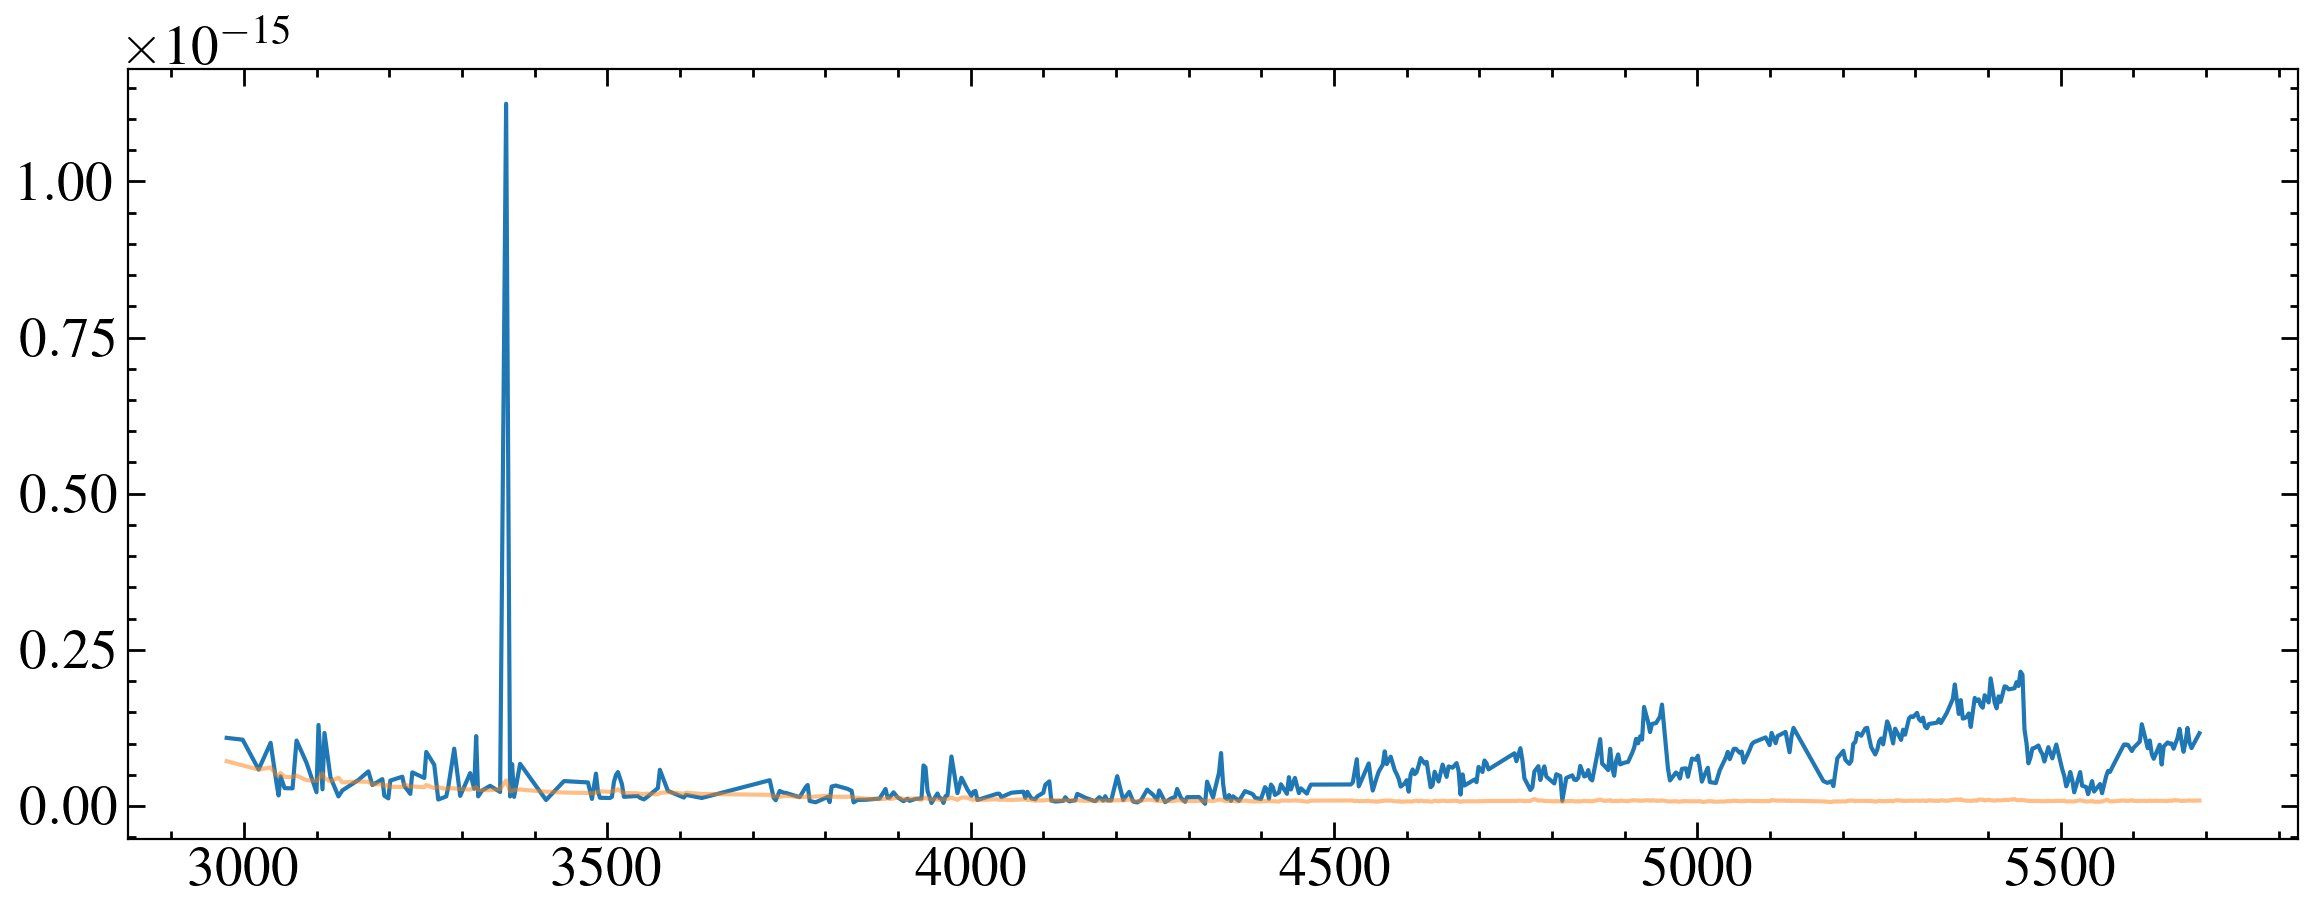

In [6]:
fig, ax = plt.subplots()
ax.plot(w[dq ==0], f[dq ==0])
ax.plot(w[dq ==0], e[dq ==0], alpha=0.5)

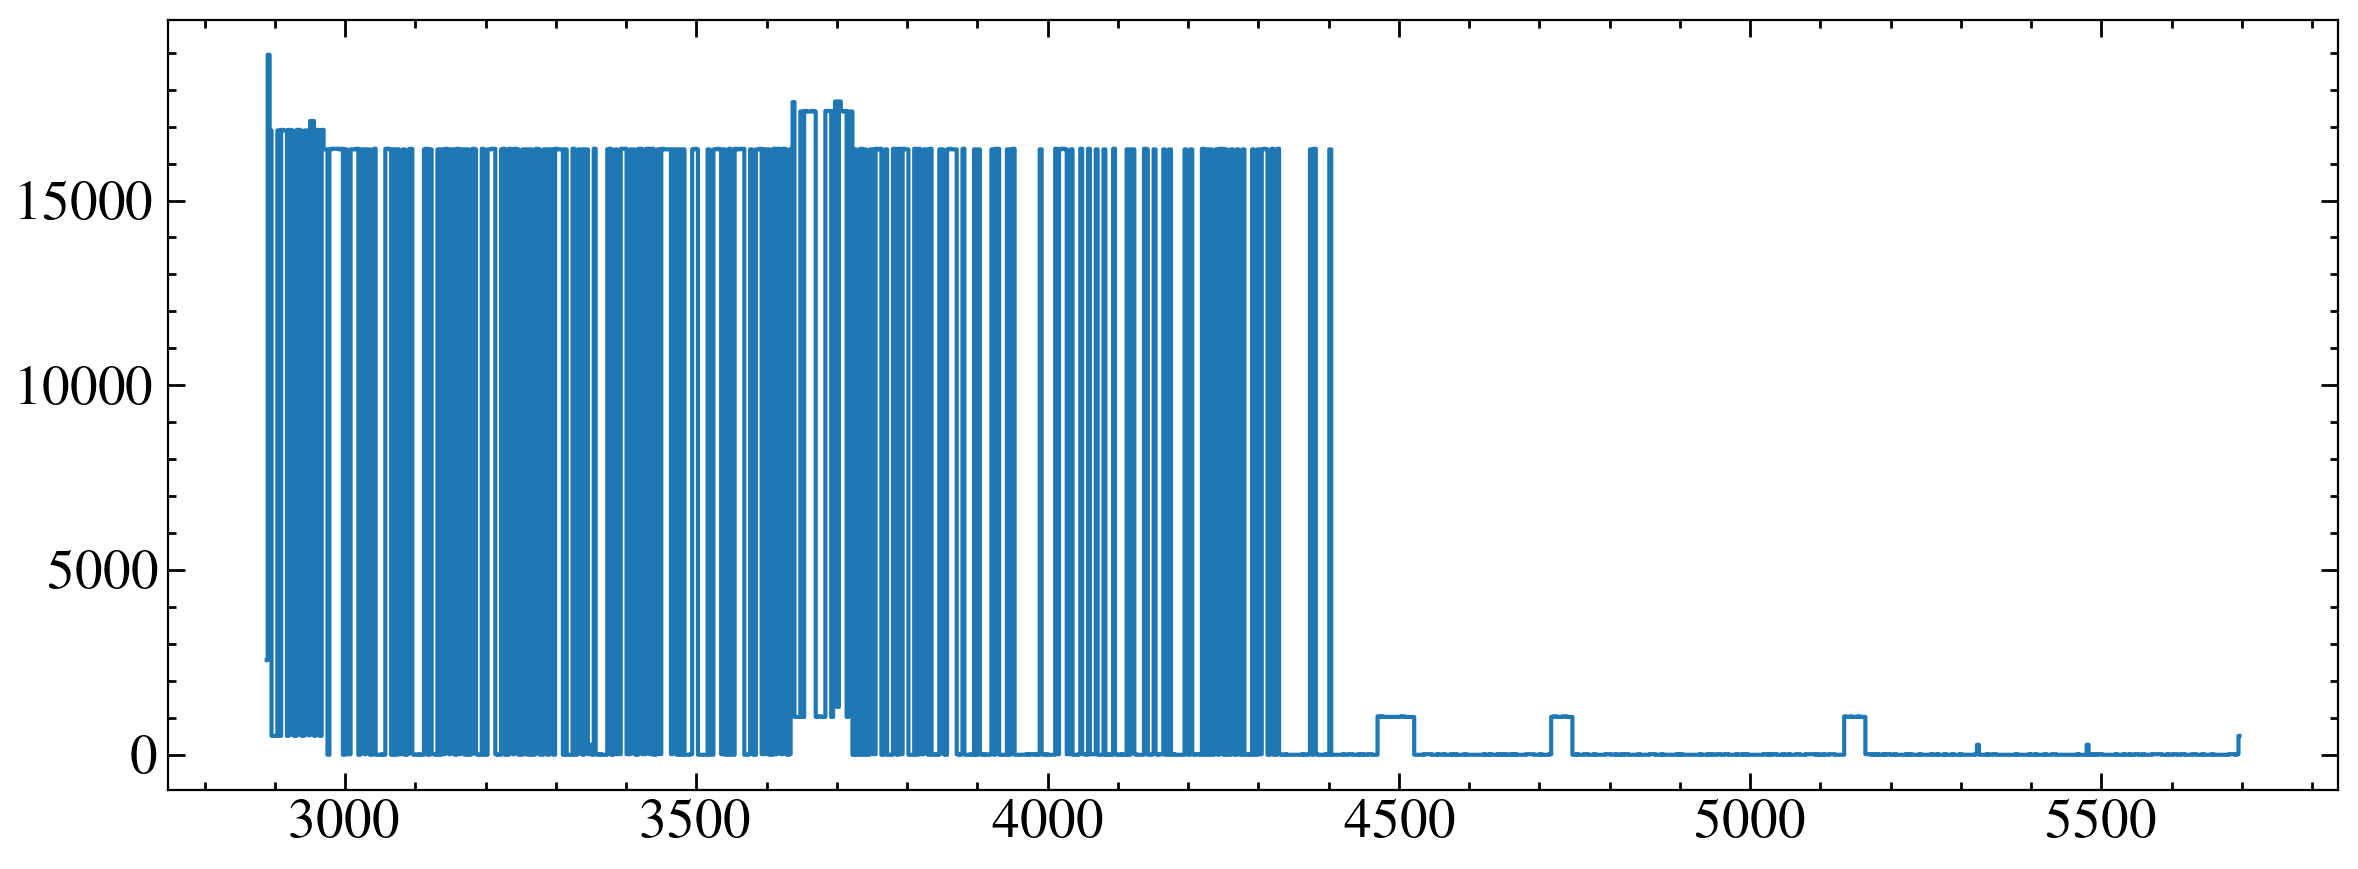

In [10]:
fig, ax = plt.subplots()
ax.step(w, dq, where='mid')
# ax.set_yscale('log')

DQ = 16384 Extracted flux not CTI corrected because gross counts are < 0. Ignoe DQ when rebinning then.

896 2.7463262994415345


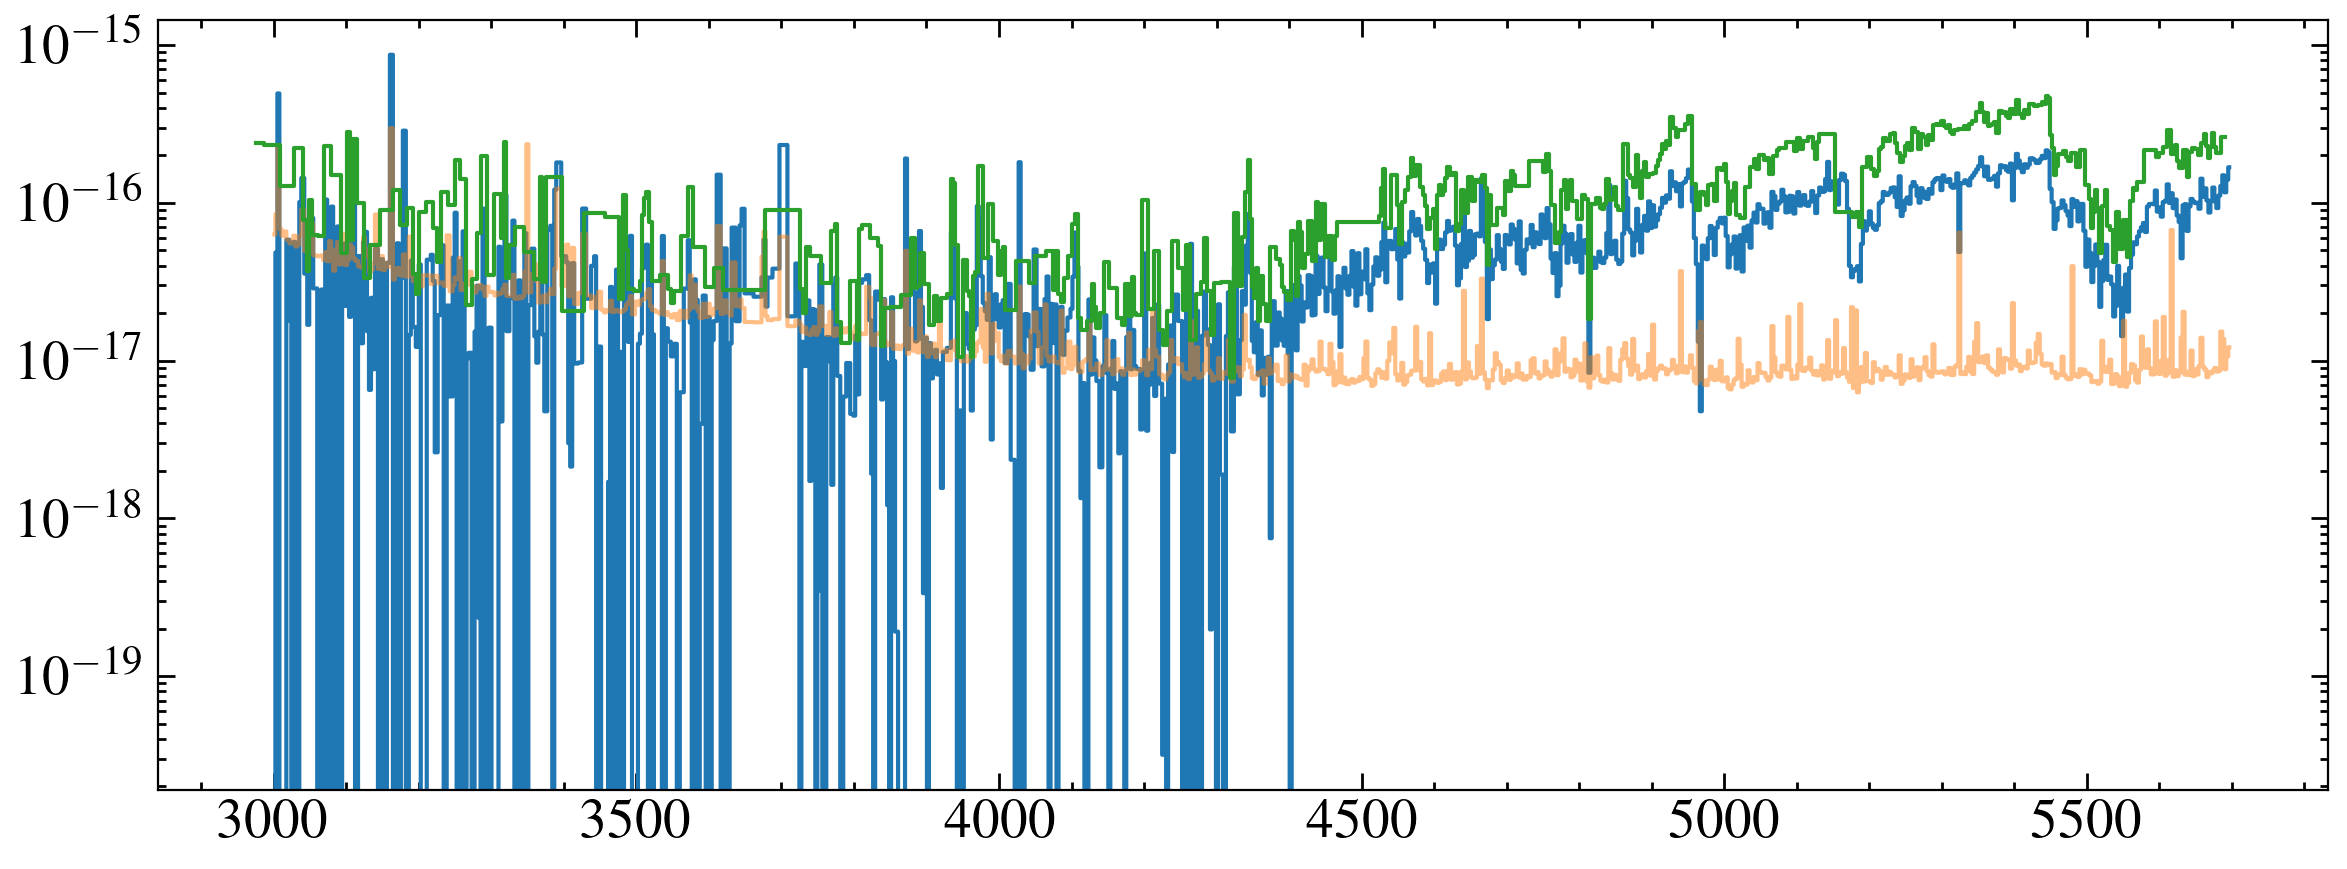

In [74]:
dq1 = dq - 16384  


mask = (w >3000) & (dq1 <1)
w1, f1, e1 = w[mask], f[mask], e[mask]
for i in range(len(f1)):
    if f1[i] > 1e-15:
        f1[i] = np.median([f[i-1], f[i+1]])
        


fig, ax = plt.subplots()
ax.step(w1, f1, where='mid')
ax.step(w1, e1, alpha=0.5, where='mid')

ax.set_yscale('log')

print(len(w1), np.median(np.diff(w1)))


hlsppath = '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/TRAPPIST-1/hlsp_muscles_hst_stis_trappist-1_g430l_v24_component-spec.fits'
data2 = fits.getdata(hlsppath, 1)
ax.step(data2['WAVELENGTH'], data2['FLUX'], where='mid')

#why is the flux in the HLSP bigger???

In [58]:
from specutils import Spectrum1D
from specutils.manipulation import FluxConservingResampler
from astropy.nddata import StdDevUncertainty


14
36


/tmp/ipykernel_358392/1067016869.py:18: RuntimeWarning: invalid value encountered in divide
  ax[1].scatter(w2, f2/e2, s=5, c='C0')


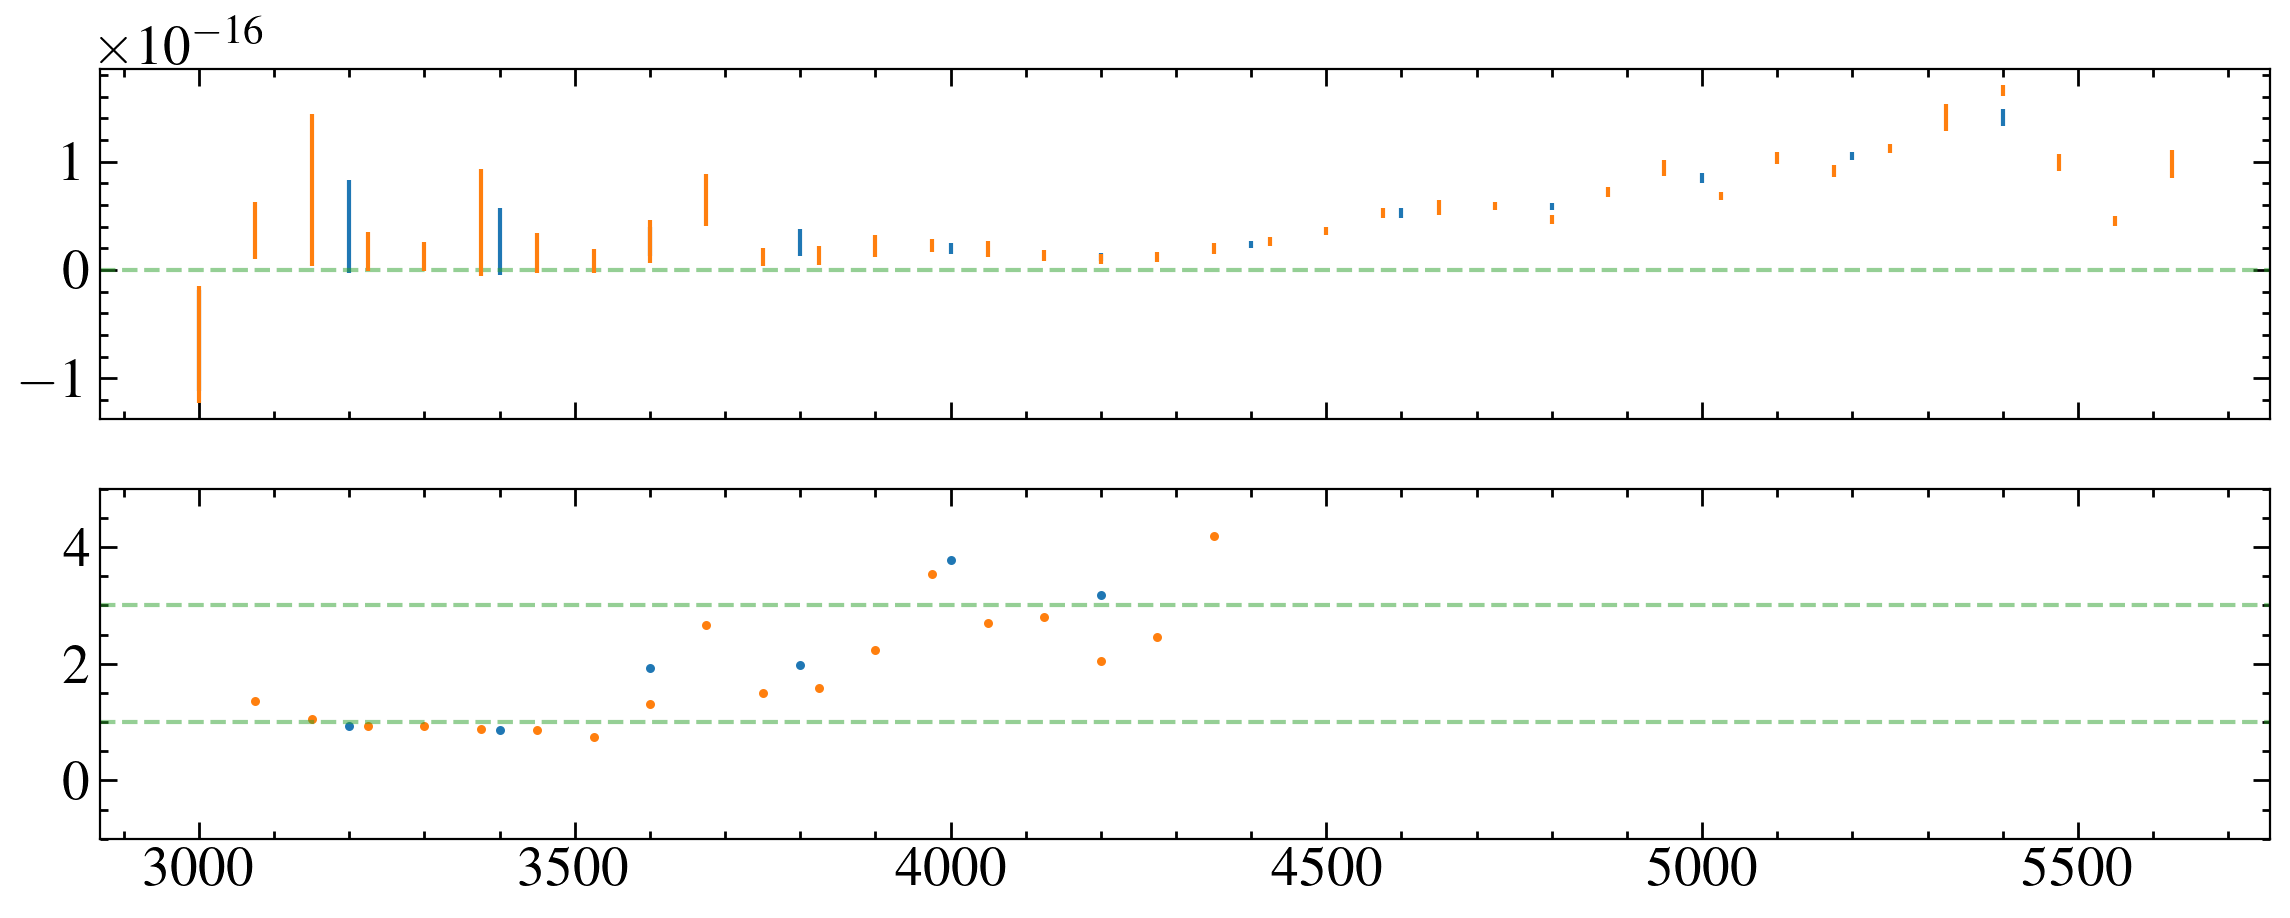

In [63]:
new_wavelength = np.arange(3000, 5690, 200)
print(len(new_wavelength))
fluxcon = FluxConservingResampler(extrapolation_treatment='zero_fill')
input_spec = Spectrum1D(spectral_axis=w1*u.AA, flux=f1*u.Unit('erg cm-2 s-1 AA-1') , uncertainty= StdDevUncertainty(e1))
new_spec_fluxcon = fluxcon(input_spec, new_wavelength*u.AA)
w2 = (new_spec_fluxcon.spectral_axis.value)
f2 = (new_spec_fluxcon.flux.value)
e2 = (1/(new_spec_fluxcon.uncertainty.array**0.5))


fig, ax = plt.subplots(nrows=2, sharex=True)
# ax.step(w2, f2, where='mid')
# ax.step(w2, e2, alpha=0.5, where='mid')
ax[0].errorbar(w2, f2, yerr=e2, ls='none', c='C0')

ax[0].axhline(0, ls='--', c='C2', alpha=0.5)

ax[1].scatter(w2, f2/e2, s=5, c='C0')

ax[1].set_ylim(-1, 5)
ax[1].axhline(3, ls='--', c='C2', alpha=0.5)
ax[1].axhline(1, ls='--', c='C2', alpha=0.5)



new_wavelength = np.arange(3000, 5690, 75)
print(len(new_wavelength))
fluxcon = FluxConservingResampler(extrapolation_treatment='zero_fill')
input_spec = Spectrum1D(spectral_axis=w1*u.AA, flux=f1*u.Unit('erg cm-2 s-1 AA-1') , uncertainty= StdDevUncertainty(e1))
new_spec_fluxcon = fluxcon(input_spec, new_wavelength*u.AA)
w2 = (new_spec_fluxcon.spectral_axis.value)
f2 = (new_spec_fluxcon.flux.value)
e2 = (1/(new_spec_fluxcon.uncertainty.array**0.5))


ax[0].errorbar(w2, f2, yerr=e2, ls='none', c='C1')

ax[1].scatter(w2, f2/e2, s=5, c='C1')




3600 looks right. Where is the moving cut off? early apparently.


In [68]:
phxpath = '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/TRAPPIST-1/hlsp_muscles_model_phx_trappist-1_na_v24_component-spec.fits'

phx = fits.getdata(phxpath, 1)
phxnorm = fits.getheader(phxpath, 0)['NORMFAC']
pw, pf = phx['WAVELENGTH'], phx['FLUX']*phxnorm
pmask = (pw > 3000) & (pw < 5700)
pw, pf = pw[pmask], pf[pmask]
pf = convolve(pf, Gaussian1DKernel(200))


135


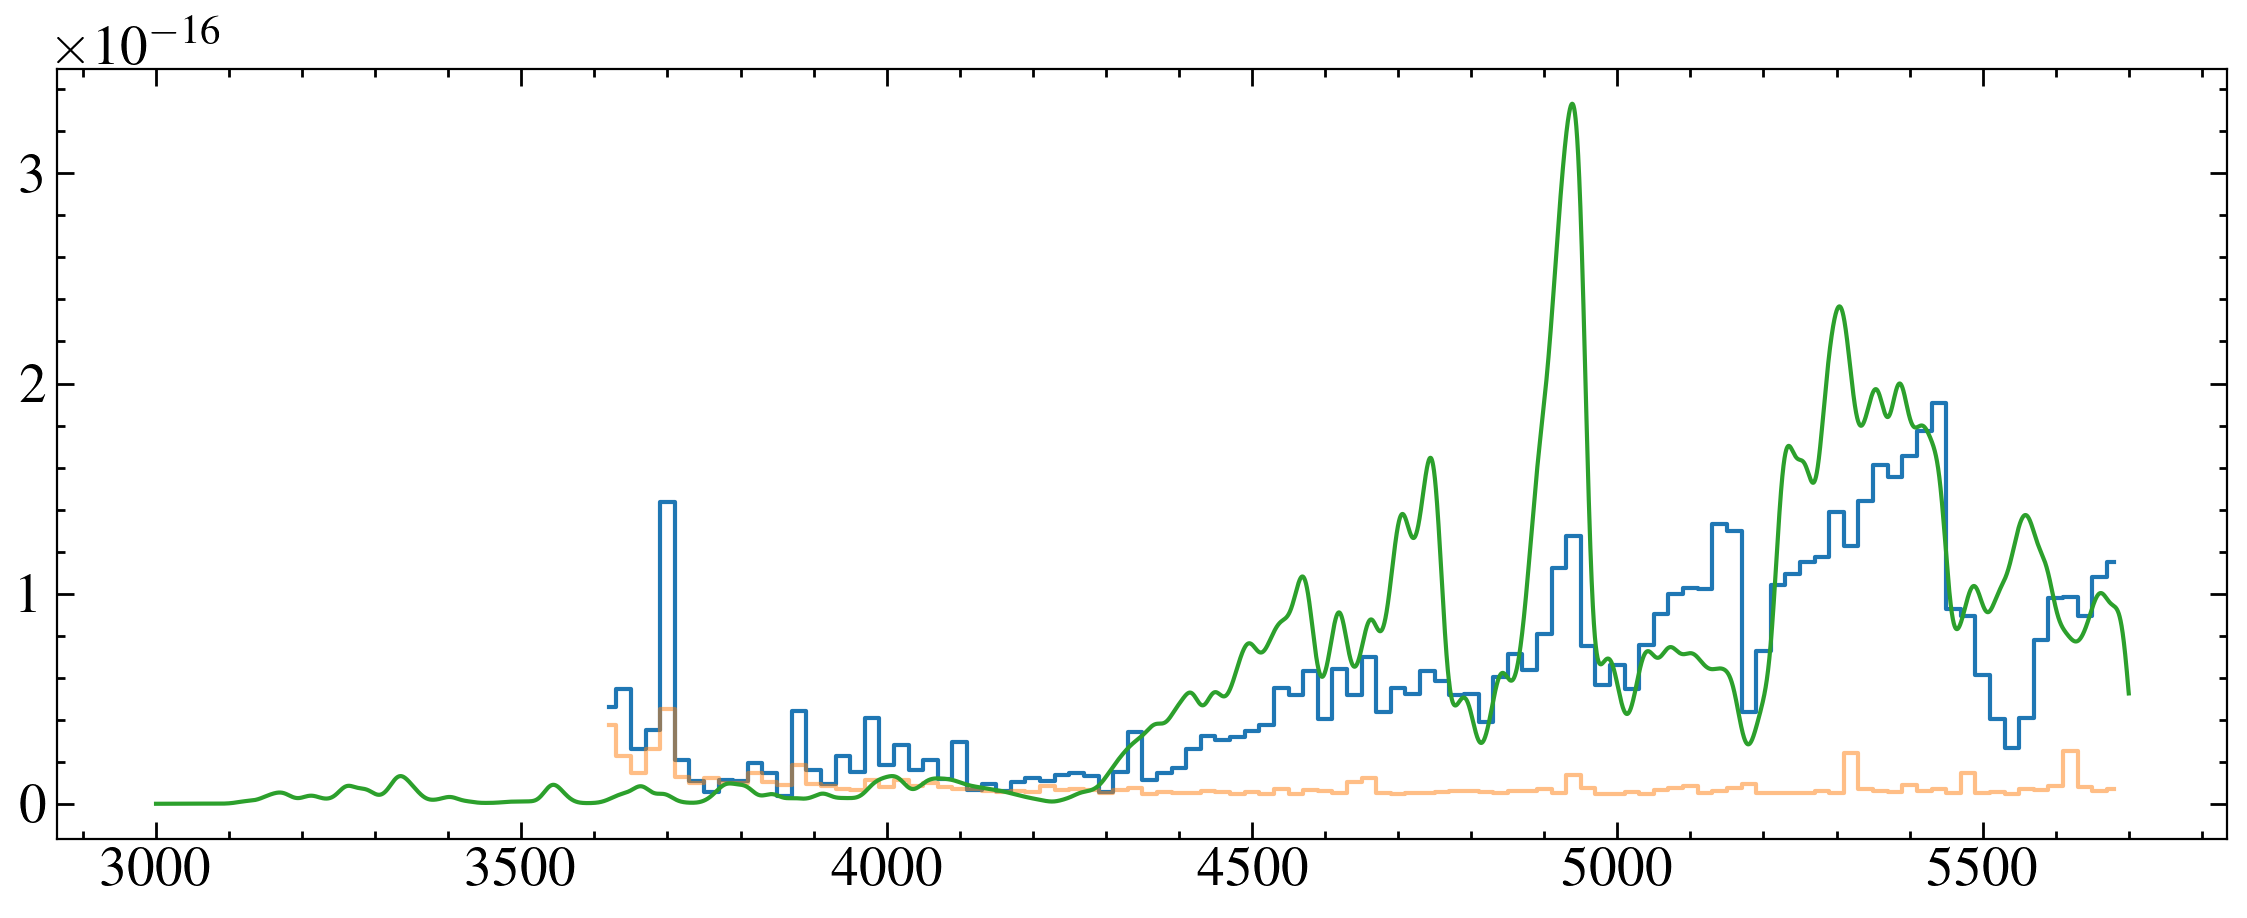

In [71]:
new_wavelength = np.arange(3000, 5690, 20)
print(len(new_wavelength))
fluxcon = FluxConservingResampler(extrapolation_treatment='zero_fill')
input_spec = Spectrum1D(spectral_axis=w1*u.AA, flux=f1*u.Unit('erg cm-2 s-1 AA-1') , uncertainty= StdDevUncertainty(e1))
new_spec_fluxcon = fluxcon(input_spec, new_wavelength*u.AA)
w2 = (new_spec_fluxcon.spectral_axis.value)
f2 = (new_spec_fluxcon.flux.value)
e2 = (1/(new_spec_fluxcon.uncertainty.array**0.5))


norm = max(f2)
fig, ax = plt.subplots()
mask = w2 > 3600
ax.step(w2[mask], f2[mask], where='mid')
ax.step(w2[mask], e2[mask], alpha=0.5, where='mid')

ax.plot(pw, pf)




Need to replace the spectrum in the G430L HLSP file. This can be a problem for Next Week David